In [60]:
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import SeqIO
import os
import pandas as pd
import re
import matplotlib_venn as mv
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib_venn import venn3
from matplotlib_venn import venn2
import seaborn as sns
import numpy as np
from scipy.stats.mstats import gmean
import sys
import skbio as sk
from skbio.diversity import alpha_diversity
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
from scipy.cluster.hierarchy import dendrogram, linkage
from skbio.stats.distance import permanova
from scipy import stats
import itertools as it
sns.set(style="ticks")
import glob
import subprocess
import shlex

import StringIO

# FIGURE 1

## a

In [185]:
df=pd.DataFrame(columns=["methods","Contig_Name","Decision" ,"variable" ,"value","Size"])

tables=glob.glob('/Volumes/BIGDATA/Sequence_Low_111.211.311.411.511/Genomes_111_211_311_411_511/read_bruts/read_bruts/processed/Patient/*/Result/Count_Matrix/count_matrix_min3ORF_woSize.txt.rar')

for table in tables:
    #print table
    METHODE=table.split('/')[9]
    
    df_rar=pd.read_csv(table, names=["Contig","Count"], skiprows=1)
    
    df_rar['Contig_Name']=df_rar.Contig.apply(lambda x: "_".join(x.split('_')[:-2]))
    df_rar['Size']=df_rar.Contig.apply(lambda x: x.split('_')[4])
    df_rar["Size"] = df_rar["Size"].astype('int')
    
    df_algo=pd.read_csv('/Volumes/BIGDATA/Sequence_Low_111.211.311.411.511/Genomes_111_211_311_411_511/read_bruts/read_bruts/processed/Patient/Explo_big_pipeline/Patient/{}/Result/Big_Table/{}.df_Big_table_PostAlgo.tab'.format(METHODE,METHODE), sep="\t", index_col=0)
    df_algo.fillna('NA', inplace=True)
    
    df_algo.replace('PHAGE with Details',"Phage with family", inplace=True)
    df_algo.replace('Bacteria Contamination',"Bacteria", inplace=True)
    df_algo.replace('Putative PHAGE',"Putative phage", inplace=True)
    df_algo.replace('environmental samples Contamination','Other contamination', inplace=True)
    df_algo.replace('NA Contamination','contamination', inplace=True)
    df_algo.replace('No attribution','NA', inplace=True)
    df_algo.replace('contamination','Other contamination', inplace=True)
    
    
    
    df_algo.rename(columns={'Final_Decision':'Decision'}, inplace=True)
    df_resume=df_algo[['Contig_Name','Decision',"Phage_Family_Phage1116_def","Host_Decision_final","LifeS_Decision_final"]]
    df_resume['methods']=METHODE
    df_all=df_rar.merge(df_resume, on="Contig_Name" )
    
   
    df_melt=pd.melt(df_all, id_vars=['methods',"Contig_Name","Decision","Size"], value_vars=["Count"])
    
    df=pd.concat([df,df_melt])

/Users/camilledhumieres/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 266.4x266.4 with 0 Axes>

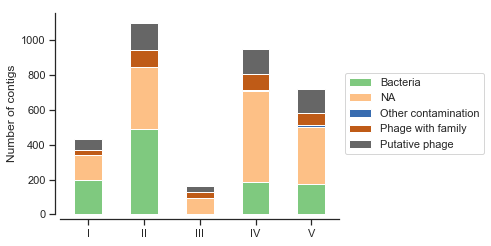

In [187]:
plt.figure(figsize=(3.7,3.7))
df.groupby(["methods","Decision"]).variable.count().unstack().plot.bar(stacked=True, cmap="Accent",figsize=(5,3.7))
sns.despine(offset=5)
plt.xticks(range(0,5),['111',"211","311","411","511"], rotation=90)
plt.legend(loc=6, 
           bbox_to_anchor=(1,0.5),
           #labels=['Bacterial','NA','Phage']
          )
plt.xlabel('')
plt.ylabel('Number of contigs')
#plt.tight_layout(rect=[0,0,0.7,1])
_=plt.xticks(np.arange(5), ('I', 'II', 'III', 'IV', 'V'), rotation=0)
_=plt.plot()

## b

In [8]:
df_read=pd.DataFrame(columns=["methods","Contig_Name","Decision" ,"variable" ,"value"])

tables=glob.glob('/*/Result/Count_Matrix/count_matrix_min3ORF_woSize.txt.norm')

for table in tables:
    #print table
    METHODE=table.split('/')[9]
    
    df_rar=pd.read_csv(table, names=["Contig","Count"], skiprows=1)
    
    df_rar['Contig_Name']=df_rar.Contig.apply(lambda x: "_".join(x.split('_')[:-2]))
    
    df_algo=pd.read_csv('/Volumes/BIGDATA/Sequence_Low_111.211.311.411.511/Genomes_111_211_311_411_511/read_bruts/read_bruts/processed/Patient/Explo_big_pipeline/Patient/{}/Result/Big_Table/{}.df_Big_table_PostAlgo.tab'.format(METHODE,METHODE), sep="\t", index_col=0)
    df_algo.fillna('NA', inplace=True)
    df_algo.replace('GRR_under_threshold','NA', inplace=True)
    df_algo.rename(columns={'Final_Decision':'Decision'}, inplace=True)
    df_algo.replace('PHAGE with Details',"Phage with family", inplace=True)
    df_algo.replace('Bacteria Contamination',"Bacteria", inplace=True)
    df_algo.replace('Putative PHAGE',"Putative phage", inplace=True)
    df_algo.replace('environmental samples Contamination','Other contamination', inplace=True)
    df_algo.replace('NA Contamination','contamination', inplace=True)
    df_algo.replace('No attribution','NA', inplace=True)
    df_algo.replace('contamination','Other contamination', inplace=True)
    
    
    
    
    df_resume=df_algo[['Contig_Name','Decision',"Phage_Family_Phage1116_def","Host_Decision_final","LifeS_Decision_final"]]
    df_resume['methods']=METHODE
    df_all=df_rar.merge(df_resume, on="Contig_Name" )
    
   
    df_melt=pd.melt(df_all, id_vars=['methods',"Contig_Name","Decision"], value_vars=["Count"])
    
    df_read=pd.concat([df_read,df_melt])

/Users/camilledhumieres/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 266.4x266.4 with 0 Axes>

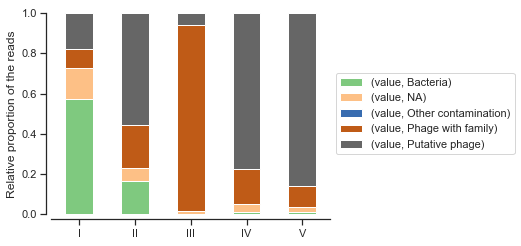

In [9]:
plt.figure(figsize=(3.7,3.7))
p=(df_read.groupby(["methods","Decision"]).value.sum()
 .div(df_read.groupby(["methods"]).value.sum()[1])
 .to_frame()
 .unstack()
 .plot.bar(stacked=True, legend=False, cmap="Accent", figsize=(5,3.7)))
 
sns.despine(offset=5)
plt.xticks(range(0,5),['111',"211","311","411","511"], rotation=90)
plt.legend(loc=6, 
           bbox_to_anchor=(1,0.5),
           #labels=['Bacterial','NA','Phage']
          )
plt.xlabel('')
plt.ylim(0,1.0)
plt.ylabel('Relative proportion of the reads')
#plt.tight_layout(rect=[0,0,0.7,1])
plt.grid(False)
_=plt.xticks(np.arange(5), ('I', 'II', 'III', 'IV', 'V'), rotation=0)

## c

In [11]:
df_LC_cdhit = pd.DataFrame(columns=["Cluster", "lengthProt", 
                           "Complete_Name", "Cov", "methods", "Pid"])

In [12]:
with open("ALL_separate_methodes_Node_min3ORF.contig.fasta.id95_cov90.clstr", "r") as fichier:
    i = 0
    for ligne in fichier:
        #if i == 5:
            #break
        if ligne[0] == ">":
            C0 = ligne[1:-1]    
        else:
            l = re.findall("\t(\d+)nt,\s*>(.*)\.\.\.[\sat]*([*\d\.]*)", ligne)[0]
            if l[2] == "*":
                #la variable l est un tuple 
                #print l
                C1 = l[0]
                C2 = l[1]
                C3 = l[2]
            else:
                l = re.findall("\t(\d+)nt,\s*>(.*)\.\.\.[\sat +-/]*([*\d\.]*)", ligne)[0]
                #print l
                C1 = l[0]
                C2 = l[1]
                C3 = l[2]
            
            df_LC_cdhit.loc[i] = [C0, C1, C2, C2.split("_")[1], C2.split("_")[0], C3]
            i += 1

In [13]:
df_LC_cdhit["Contig_Name"]=df_LC_cdhit.Complete_Name.apply(lambda x: "_".join(x.split("_")[:-2]))

In [14]:
df_LC_cdhit_details=df_LC_cdhit.merge(df_read, on="Contig_Name", how='left', suffixes=('', '_y'))

In [15]:
tmp = df_LC_cdhit_details.groupby("Cluster").methods.apply(lambda x:"_".join(x.unique()))

In [16]:
df_LC_cdhit_details = df_LC_cdhit_details.merge(tmp.to_frame(), left_on="Cluster", right_index=True, suffixes=("", "_group_complete"))
df_LC_cdhit_details['Number_Methods']=df_LC_cdhit_details.methods_group_complete.apply(lambda x: len(x.split("_")))
df_LC_cdhit_details["Number_Methods"] =df_LC_cdhit_details["Number_Methods"].astype('int')                                                

Text(0.5,4.8,'Number of methods sharing contig cluster')

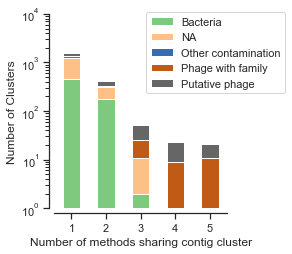

In [17]:
df_LC_cdhit_details[df_LC_cdhit_details.Pid == "*"].groupby(['Number_Methods','Decision']).Cluster.count().unstack().plot.bar(stacked=True, cmap="Accent",figsize=(5,3.7))
sns.despine(offset=5)
plt.xticks(range(0,5),['1',"2","3","4","5"], rotation=0)
plt.yscale('log', nonposy='clip')
plt.ylim(1, 10000)

plt.legend(loc=6, 
           bbox_to_anchor=(0.5,0.8),
           #labels=['Bacterial\nContamination','NA','Phage']
          )
#plt.xlabel('Number of methods sharing contig cluster')
plt.ylabel('Number of Clusters')
plt.tight_layout(rect=[0,0,0.7,1])
plt.xlabel("Number of methods sharing contig cluster")

## d

In [19]:
Liste=['Phage with family','Putative phage']
Liste_Clust_Phage = df_LC_cdhit_details[(df_LC_cdhit_details.Pid == "*")  & (df_LC_cdhit_details.Decision.isin(Liste))].Cluster.tolist()

In [20]:
df_test2 = df_LC_cdhit_details[df_LC_cdhit_details.Cluster.isin(Liste_Clust_Phage)].groupby(['Cluster','methods']).value.count().unstack().fillna(0)
df_test2[df_test2 > 0] = 1
df_test2.head()

methods       111  211  311  411  511
Cluster                              
Cluster 0     1.0  1.0  1.0  1.0  0.0
Cluster 1     1.0  1.0  1.0  0.0  1.0
Cluster 1001  0.0  0.0  0.0  1.0  1.0
Cluster 1002  0.0  0.0  0.0  0.0  1.0
Cluster 1005  0.0  0.0  1.0  0.0  0.0

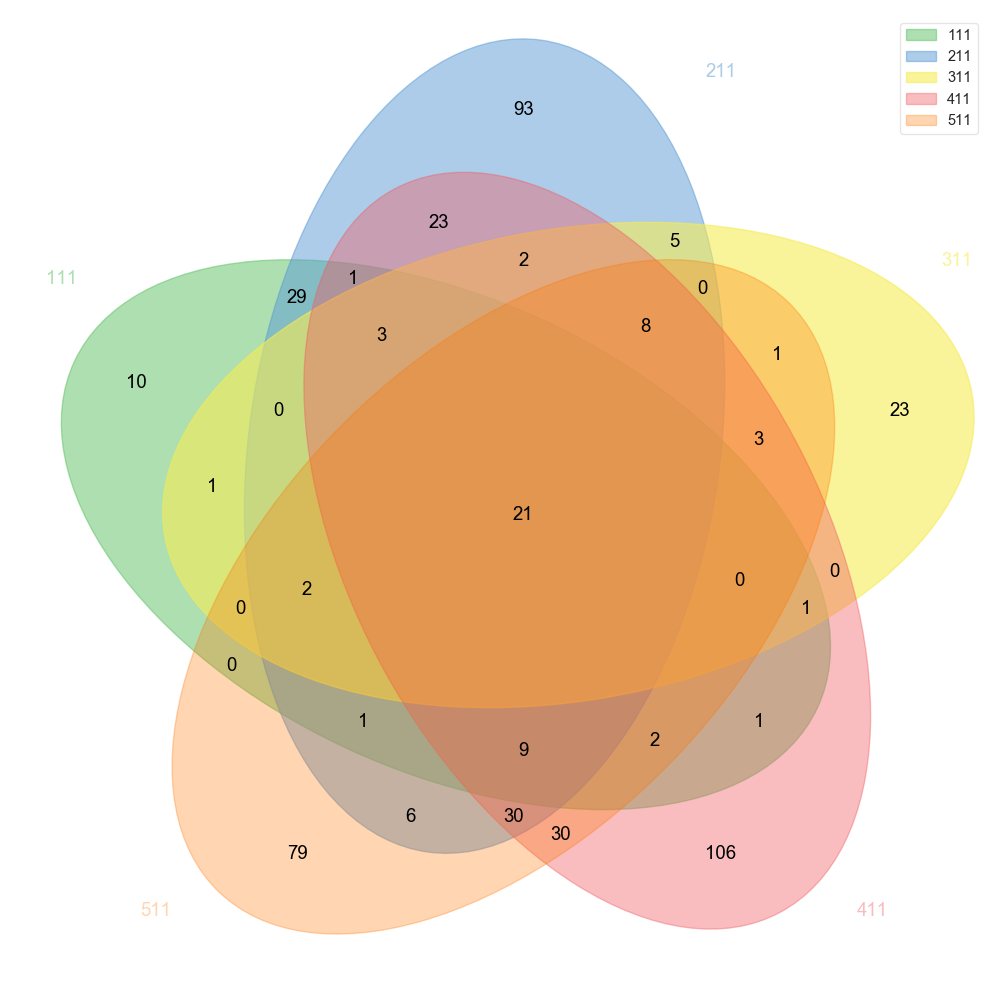

In [21]:
import venn
labels=[]
for c in df_test2.columns:
    labels.append(set(df_test2[df_test2[c] == 1].reset_index().Cluster))
fig, ax = venn.venn5(venn.get_labels(labels), names=['111', '211', '311', '411', '511'])

# FIGURE 2

## a

In [23]:
df_LC=pd.read_csv('/Volumes/BIGDATA/Sequence_Low_111.211.311.411.511/Genomes_111_211_311_411_511/read_bruts/read_bruts/processed/Patient/Explo_big_pipeline/Patient/411/Result/Big_Table/411.df_Big_table_PostAlgo.tab', sep="\t", index_col=0)

In [24]:
Liste=["PHAGE with Details","Putative PHAGE"]
ListeSize_LC=df_LC[df_LC.Final_Decision.isin(Liste)].Size.tolist()

In [26]:
df_HC=pd.read_csv('/Volumes/BIGDATA/Sequence_High_211.311.411.511/Read_Bruts/L1/processed/Patient/Big_Pipeline/Patient/411/Result/Big_Table/411.df_Big_table_PostAlgo.tab', sep="\t", index_col=0)

In [27]:
Liste=["PHAGE with Details","Putative PHAGE"]
ListeSize_HC=df_HC[df_HC.Final_Decision.isin(Liste)].Size.tolist()

In [28]:
df_HC_LC_411=pd.DataFrame(columns=["Coverage","Phage with family", "Putative phage"])
df_HC_LC_411.loc[1]=["HC",594,1400] 
df_HC_LC_411.loc[2]=["LC",91,146]
df_HC_LC_411.set_index('Coverage', inplace=True)

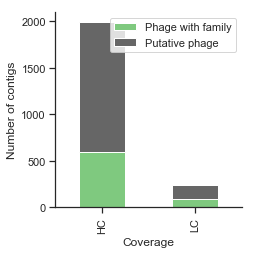

In [35]:
df_HC_LC_411.plot.bar(stacked=True, cmap="Accent", figsize=(3.7,3.7))
plt.legend()
plt.ylabel('Number of contigs')
sns.despine()
plt.xticks()
#plt.legend(loc='right', bbox_to_anchor=(1.5, 1.5))
plt.tight_layout()

## b

In [44]:
def VS_Contig_info_abondance(df_VS_path,df_bigtable_path):
    df_VS=pd.read_csv(df_VS_path, sep='\t')
    df_bigtable=pd.read_csv(df_bigtable_path, sep='\t')
    if "Size" in df_VS.columns:
        del df_VS["Size"]
    
    df_VS['ref_genome_format']=df_VS.ref_genome.apply(lambda x: "_".join(x.split('_')[:-2]))
    df_bigtable.drop('Unnamed: 0', 1, inplace=1)
    df_bigtable_short=df_bigtable[['Contig_Name','Final_Decision',"Phage_Family_Phage1116_def","Host_Decision_final","LifeS_Decision_final","PhageName","GRR_x"]]
    df_format=df_VS.merge(df_bigtable_short, left_on="ref_genome_format", right_on="Contig_Name")
    df_format.drop('ref_genome', 1, inplace=1)
    titi = pd.melt(df_format, id_vars=["PhageName","GRR_x","ref_genome_format","Final_Decision","Phage_Family_Phage1116_def","Host_Decision_final","LifeS_Decision_final"],
              value_vars=[i for i in df_VS.columns[1:]][:-1])
    titi["Patient"] = titi.variable.str[0:2]
    titi["day"] = titi.variable.apply(lambda x: x.split('_')[1])
    return titi

In [45]:
df_LC_abon=VS_Contig_info_abondance("/Volumes/BIGDATA/Sequence_Low_111.211.311.411.511/Genomes_111_211_311_411_511/read_bruts/read_bruts/processed/Patient/411/Bowtie/comptage/count_matrix_min3ORF_woSize.txt","/Volumes/BIGDATA/Sequence_Low_111.211.311.411.511/Genomes_111_211_311_411_511/read_bruts/read_bruts/processed/Patient/Explo_big_pipeline/Patient/411/Result/Big_Table/411.df_Big_table_PostAlgo.tab")

In [46]:
df_HC_abon=VS_Contig_info_abondance("/Volumes/BIGDATA/Sequence_High_211.311.411.511/Read_Bruts/L1/processed/Patient/411/Bowtie/comptage/count_matrix_min3ORF.txt","/Volumes/BIGDATA/Sequence_High_211.311.411.511/Read_Bruts/L1/processed/Patient/Big_Pipeline/Patient/411/Result/Big_Table/411.df_Big_table_PostAlgo.tab")

In [47]:
df_all=pd.concat([df_LC_abon,df_HC_abon])

In [48]:
df_all.replace('PHAGE with Details',"Phage with family", inplace=True)
df_all.replace('Bacteria Contamination',"Bacteria", inplace=True)
df_all.replace('Putative PHAGE',"Putative phage", inplace=True)
df_all.replace('environmental samples Contamination','Other contamination', inplace=True)
df_all.replace('NA Contamination','Other contamination', inplace=True)
df_all.replace('No attribution','NA', inplace=True)
df_all.replace('Archaea Contamination','Other contamination', inplace=True)
df_all.replace('Eukaryota Contamination','Other contamination', inplace=True)

In [54]:
Liste=[66527794,
 66527794,
 66527794,
 66527794,
 66527794,
 607977,
 607977,
 607977,
 607977,
 607977]


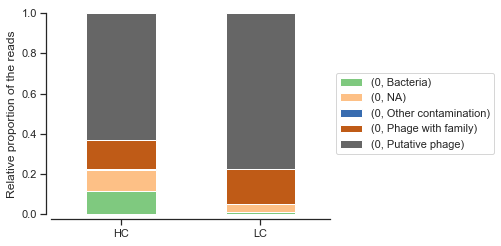

In [56]:
(df_all.groupby(["day","Final_Decision"]).value.sum()
 .div([int(i) for i in Liste])
 .to_frame()
 .unstack()
 .plot.bar(stacked=True, legend=False, cmap="Accent", figsize=(5,3.7)))
 
sns.despine(offset=5)
plt.xticks(range(0,2),['HC',"LC"], rotation=90)
plt.legend(loc=6, 
           bbox_to_anchor=(1,0.5),
           #labels=['Bacterial','NA','Phage']
          )
plt.xlabel('')
plt.ylim(0,1.0)
plt.ylabel('Relative proportion of the reads')
#plt.tight_layout(rect=[0,0,0.7,1])
plt.grid(False)
_=plt.xticks(np.arange(2), ('HC', 'LC'), rotation=0)


## c

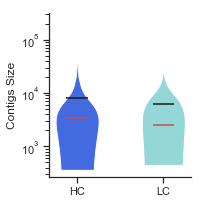

In [43]:
plt.figure(figsize=(3,3))
v = plt.violinplot(dataset=[ListeSize_HC,ListeSize_LC],positions=[1,2], showmeans=True, showextrema=False, showmedians=True, points=10000)

v["bodies"][0].set_alpha(1)
v["bodies"][1].set_alpha(1)

v["bodies"][0].set_facecolor('#436ade')
v["bodies"][1].set_facecolor('#95d6d6')

#v["cmeans"].set_linestyle("--")
v["cmeans"].set_color("k")
v["cmedians"].set_color("r")
plt.xticks([1.0,2.0],["HC","LC"])
sns.despine()
plt.yscale("log")
plt.ylabel('Contigs Size')
plt.tight_layout()

In [39]:
from scipy import stats

import scipy.stats as ss
ss.ranksums(ListeSize_LC,ListeSize_HC)

RanksumsResult(statistic=-4.830422570327804, pvalue=1.3624358978292511e-06)

# FIGURE 3

In [58]:
df_411_Read_Selector = pd.DataFrame(columns=["Name", "Number_reads", 
                                             "Number_Contig_min3ORF",
                                             "Number_contig_Phage_details","Number_contig_putative_phage","Number_Contig_bact","Number_contig_NA",
                                             ],
                                    index=range(0,11))

In [61]:
i=0
for File in glob.glob('/Volumes/BIGDATA/Sequence_High_211.311.411.511/Read_Bruts/411_ReadSelector/processed/Patient/*')[:-3]:
    #File /Volumes/BIGDATA/Sequence_High_211.311.411.511/Read_Bruts/411_ReadSelector/processed/Patient/411_HC_1
    
    #Name
    Name = os.path.basename(File) #411_HC_1
    print Name
    df_411_Read_Selector.loc[i,"Name"] = Name
    #Number reads
    Path_Number_reads = os.path.join("/".join(File.split("/")[0:6]),os.path.basename(File)+"_R1.fastq")
    cmd_Number_reads="grep -c + {}".format(Path_Number_reads)
    Number_reads=subprocess.check_output(shlex.split(cmd_Number_reads))
    Number_reads=int(Number_reads)
    df_411_Read_Selector.loc[i,"Number_reads"] = Number_reads
   
    #Number contig
    Path_contigs = os.path.join(File, "{}.Node_min3ORF.contig.fasta".format(Name))
    
    print Path_contigs
    
    cmd_Number_contigs="grep -c > {}".format(Path_contigs)

    Number_contigs=subprocess.check_output(shlex.split(cmd_Number_contigs))
    Number_contigs=int(Number_contigs)
    df_411_Read_Selector.loc[i,"Number_Contig_min3ORF"] = Number_contigs
    
    #Number_contig_ details
    df=pd.read_csv('{}/Result/Big_Table/{}.df_Big_table_PostAlgo.tab'.format(File,Name), sep="\t", index_col=0)
    
    Number_contig_Phage_details=len(df[df.Final_Decision == "PHAGE with Details"])
    df_411_Read_Selector.loc[i,"Number_contig_Phage_details"] = Number_contig_Phage_details
    
    Number_contig_putative_phage=len(df[df.Final_Decision == "Putative PHAGE"])
    df_411_Read_Selector.loc[i,"Number_contig_putative_phage"] = Number_contig_putative_phage
    
    Number_Contig_bact=len(df[df.Final_Decision == "Bacteria Contamination"])
    df_411_Read_Selector.loc[i,"Number_Contig_bact"] = Number_Contig_bact
    
    Number_contig_NA=len(df[df.Final_Decision == "No attribution"])
    df_411_Read_Selector.loc[i,"Number_contig_NA"] = Number_contig_NA
    
    i+=1

411_HC_1
/Volumes/BIGDATA/Sequence_High_211.311.411.511/Read_Bruts/411_ReadSelector/processed/Patient/411_HC_1/411_HC_1.Node_min3ORF.contig.fasta
411_HC_10
/Volumes/BIGDATA/Sequence_High_211.311.411.511/Read_Bruts/411_ReadSelector/processed/Patient/411_HC_10/411_HC_10.Node_min3ORF.contig.fasta
411_HC_20
/Volumes/BIGDATA/Sequence_High_211.311.411.511/Read_Bruts/411_ReadSelector/processed/Patient/411_HC_20/411_HC_20.Node_min3ORF.contig.fasta
411_HC_30
/Volumes/BIGDATA/Sequence_High_211.311.411.511/Read_Bruts/411_ReadSelector/processed/Patient/411_HC_30/411_HC_30.Node_min3ORF.contig.fasta
411_HC_40
/Volumes/BIGDATA/Sequence_High_211.311.411.511/Read_Bruts/411_ReadSelector/processed/Patient/411_HC_40/411_HC_40.Node_min3ORF.contig.fasta
411_HC_50
/Volumes/BIGDATA/Sequence_High_211.311.411.511/Read_Bruts/411_ReadSelector/processed/Patient/411_HC_50/411_HC_50.Node_min3ORF.contig.fasta
411_HC_60
/Volumes/BIGDATA/Sequence_High_211.311.411.511/Read_Bruts/411_ReadSelector/processed/Patient/411_HC

In [64]:
#add HC point by hand
df=pd.read_csv('/Volumes/BIGDATA/Sequence_High_211.311.411.511/Read_Bruts/L1/processed/Patient/Big_Pipeline/Patient/411/Result/Big_Table/411.df_Big_table_PostAlgo.tab', sep="\t", index_col=0)

In [65]:
df.Final_Decision.value_counts()

No attribution                         9640
Bacteria Contamination                 3980
Putative PHAGE                         1400
PHAGE with Details                      594
environmental samples Contamination      28
NA Contamination                         11
Archaea Contamination                     2
Eukaryota Contamination                   1
Name: Final_Decision, dtype: int64

In [66]:
df_411_Read_Selector.loc[10,]=["411_HC_100",43574475,15656,594,1400,3980,9640]

In [67]:
df_411_Read_Selector=df_411_Read_Selector.convert_objects(convert_numeric=True)

/Users/camilledhumieres/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [68]:
df_411_Read_Selector['PE']=df_411_Read_Selector.Number_reads.apply(lambda x: x*2)

In [69]:
df_411_Read_Selector['Phages']=df_411_Read_Selector.Number_contig_Phage_details + df_411_Read_Selector.Number_contig_putative_phage

In [70]:
#add LC by hand
df=pd.read_csv('/Volumes/BIGDATA/Sequence_Low_111.211.311.411.511/Genomes_111_211_311_411_511/read_bruts/read_bruts/processed/Patient/Explo_big_pipeline/Patient/411/Result/Big_Table/411.df_Big_table_PostAlgo.tab', sep='\t', index_col=0)

In [71]:
df.Final_Decision.value_counts()

No attribution                         520
Bacteria Contamination                 188
Putative PHAGE                         146
PHAGE with Details                      91
environmental samples Contamination      7
Name: Final_Decision, dtype: int64

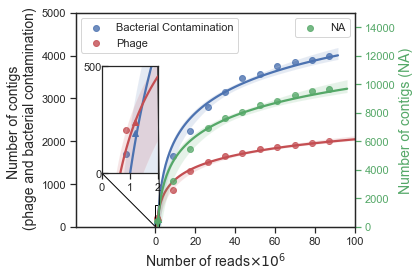

In [75]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid.inset_locator import inset_axes

fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()

axins1 = inset_axes(ax1,
                    width='20%', 
                    height='50%',
                    loc=6,
                    borderpad=2.4)
                    #bbox_to_anchor=(0.1, 0.5, 1, 1),
                   # bbox_transform=ax1.transAxes)
x1, x2, y1, y2 = 0, 2000000, 0, 500 
axins1.axis([x1, x2, y1, y2])

#axins2 = axins1.twinx()

dic_conf = {"Phages": ["Phage", "r", ax1, (1183870, 237), axins1],
            "Number_Contig_bact": ["Bacterial Contamination", "b", ax1, (1183870, 188), axins1],
            'Number_contig_NA': ["NA", "g", ax2, (1183870, 520), axins2]}

for k in dic_conf.keys():
    dec, col, ax, pos, axins = dic_conf[k]
    for a in [ax, axins]:
        sns.regplot(x="PE",
                    y=k, 
                    data=df_411_Read_Selector,
                    logx=True, ax=a, label=dec, color=col)
        a.plot(pos[0], pos[1], col+"^")


# fix the number of ticks on the inset axes

axins2.set_ylabel("")
axins1.set_ylabel("")
axins1.set_xlabel("")
xlabels_inset = np.array([0,1,2])
axins1.set_xticks(xlabels_inset*1e6)
axins1.set_xticklabels(xlabels_inset)
axins1.tick_params(axis="y", top=False, right=False, direction="in",pad=0)
#axins1.tick_params(axis="x",direction="in")

axins2.tick_params(top=False, left=False, direction="in",pad=0)

axins1.set_yticks([0,500])
axins2.set_yticks([0, 1000])
#axins1.set_yticks(fontsize=10)
#axins1.tick_params(fontsize=10)
axins2.set_ylim(0,1000)
#axins1.set_ylim(0,100)




ax1.legend(loc=2)
ax1.set_ylim(0,5000)
ax1.set_xlim(-4e7,10e7)
xlabels=np.array([0,20,40,60,80,100])
ax1.set_xticks(xlabels*1e6)
ax1.set_xticklabels(xlabels)
ax1.set_ylabel('Number of contigs \n (phage and bacterial contamination)',fontsize=14)
ax1.set_xlabel('Number of reads' + (r"$\times10^{6}$"),fontsize=14)
ax1.tick_params(top=False)


ax2.tick_params('y', colors='g')
ax2.legend()
ax2.set_ylim(0,15000)
ax2.set_ylabel('Number of contigs (NA)', color='g',fontsize=14)

mark_inset(ax1, axins1, loc1=1, loc2=3, fc="0.9", ec="0", lw=1)

plt.tick_params(top=False)
plt.tight_layout()

# Figure 4

## a

In [77]:
df_rar = pd.read_csv("/Volumes/BIGDATA/Echantillons_Temoins/Read_bruts/ALL_reads/processed_old/Result/Count_Matrix/count_matrix_min3ORF.txt.woSize.rar", index_col=0)

In [78]:
df_rar.reset_index(inplace=True)

In [80]:
df_melt = pd.melt(df_rar, id_vars=["Contig"]) #j'ai enlevé la colonne contig_name
df_melt["Patient"] = df_melt.variable.apply(lambda x: x[0:2])
df_melt["Replicate"] = df_melt.variable.apply(lambda x: x[2])
df_melt["Protocole"] = df_melt.variable.apply(lambda x: x.split('_')[1])


In [81]:
def fc_alpha(df):
    alpha = len(df[df.value != 0])
    return alpha 

In [82]:
df_alpha=df_melt.groupby(["Protocole","Patient","Replicate"]).apply(fc_alpha).groupby(level=["Protocole","Patient"]).mean()
df_alpha

Protocole  Patient
S          AA         2500.000000
           BB         3874.333333
           CC         1532.333333
SP30       AA          992.000000
           BB         3137.000000
           CC          959.666667
SP90       AA          495.666667
           BB         2159.666667
           CC          623.666667
dtype: float64

Text(0.5,0,'')

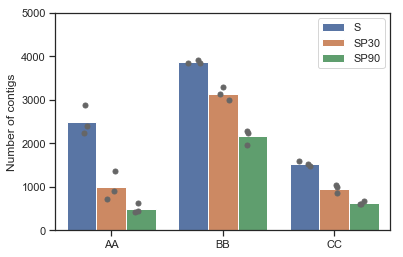

In [84]:
df_final = df_melt.groupby(["Protocole","Patient","Replicate"]).value.apply(lambda x: sum(x>0)).reset_index()
pat = df_final.groupby(["Protocole"]).value.mean().sort_values(ascending=0).index
sns.barplot(data=df_final,
             x="Patient",
             y="value",
             hue="Protocole", ci=None,
            hue_order=pat)
ax = sns.stripplot(data=df_final,
                   jitter=0.2,
             x="Patient",
             y="value",
             hue="Protocole", 
                split=True,
              edgecolor="k",
             linewidth=1,
             hue_order=pat,
             )
ax.legend_.remove()
plt.legend(ax.patches[::3], pat)
_ = [c.set_color('0.4') for c in ax.collections]
plt.ylabel("Number of contigs")
plt.ylim(0,5000)
plt.tick_params(top=False, right=False)
plt.xlabel("")

## b

In [86]:
def fc_gamma(df):
    gamma = len(df[df.value != 0].Contig.unique())
    return gamma

In [87]:
df_gamma=df_melt.groupby(["Protocole","Patient"]).apply(fc_gamma)
df_gamma

Protocole  Patient
S          AA         3204
           BB         4477
           CC         2012
SP30       AA         1695
           BB         3986
           CC         1298
SP90       AA          861
           BB         3058
           CC          874
dtype: int64

In [88]:
df_beta = (df_gamma/df_alpha) -1
df_beta=df_beta.reset_index(name='value')

Text(0.5,0,'')

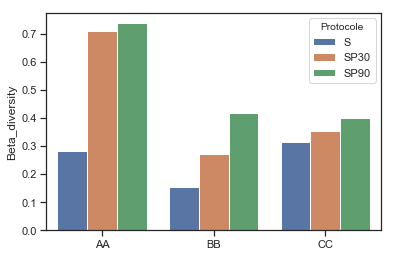

In [89]:
df_final = df_melt.groupby(["Protocole","Patient","Replicate"]).value.apply(lambda x: sum(x>0)).reset_index()
pat = df_final.groupby(["Protocole"]).value.mean().sort_values(ascending=0).index
sns.barplot(data = df_beta,
             x="Patient",
             y="value",
             hue="Protocole", ci=None, hue_order=pat )
plt.ylabel('Beta_diversity')

plt.tick_params(top=False, right=False)
plt.xlabel("")

## c

In [92]:
df=pd.read_csv('/Volumes/BIGDATA/Echantillons_Temoins/Read_bruts/ALL_reads/processed_old/Result/Count_Matrix/count_matrix_min3ORF_woSize.txt', sep='\t', index_col=0)

In [93]:
def Norm_total_count(df):
    av=np.mean(df.sum())
    dico=(df.sum()/av).to_dict()
    for col in df.columns:
        
        df[col]=df[col]/dico[col]
    return df   

In [95]:
df_norm=pd.read_csv('/Volumes/BIGDATA/Echantillons_Temoins/Read_bruts/ALL_reads/processed_old/Result/Count_Matrix/count_matrix_min3ORF.txt.woSize.total_count', index_col=0)

In [96]:
df_norm_T=df_norm.T

In [97]:
BDiv_BC= beta_diversity("braycurtis", df_norm_T.astype(int).values, ids=df_norm_T.index)

In [99]:
df = pd.DataFrame(data=BDiv_BC.data,    # values
             index=["_".join(i.split('_')[:-1]) for i in BDiv_BC.ids],   # 1st column as index
             columns= ["_".join(i.split('_')[:-1]) for i in BDiv_BC.ids])

In [101]:
L = linkage(BDiv_BC.data, method='ward')

/Users/camilledhumieres/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':


<Figure size 410.4x266.4 with 0 Axes>

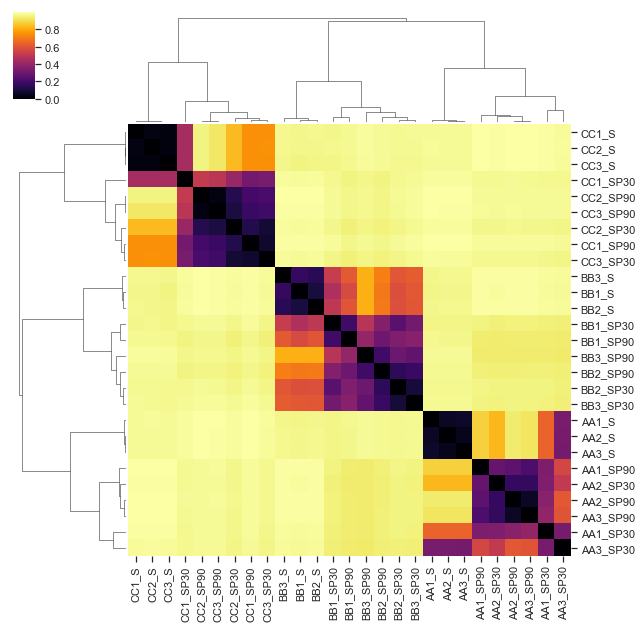

<Figure size 410.4x266.4 with 0 Axes>

In [102]:
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
#g = sns.clustermap(flights, cmap=cmap, linewidths=.5)
# pas besoin de mettre method='ward', metric='braycurtis' car je precise L
cg = sns.clustermap(df, pivot_kws=None,
                    cmap=plt.cm.inferno,
                   col_linkage=L, row_linkage=L)
_=plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
_=plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.figure(figsize=(5.7,3.7))

# Figure 5

## a

In [107]:
df_format2 = pd.read_csv('/Volumes/BIGDATA/Echantillons_Temoins/Read_bruts/ALL_reads/processed/Patient/ALL_ALL_ALL/Result/Big_Table/ALL_ALL_ALL.df_AbRel.tab', sep='\t')

In [108]:
df_melt = pd.melt(df_format2, id_vars=["ref_genome_format","Final_Decision","Phage_Family_Phage1116_def","Host_Decision_final","LifeS_Decision_final", "DNA"])

In [109]:
df_melt["Patient"] = df_melt.variable.str[0:2]
df_melt["Replicate"] = df_melt.variable.apply(lambda x: x[2])
df_melt["Protocole"] = df_melt.variable.apply(lambda x: x.split('_')[1])

In [110]:
df_melt.replace(np.nan, "NA", inplace=True)

Text(0.5,0,'')

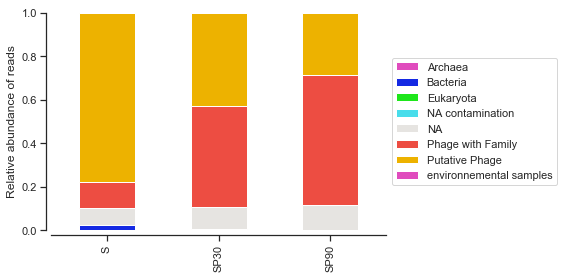

In [112]:
((df_melt.groupby(["Final_Decision",'Protocole']).value.sum()
 .div(df_format2.sum().iloc[1]*9)) # somme des compte avec le groupby Phage_Family_Phage1116_def/Patieent/protocole - puis je disvise par la somme d'une colonne (la somme est la meme pour tous le monde )X 3 car 3 replicate
 .to_frame()
 .reorder_levels(["Protocole","Final_Decision"])
 .unstack()
 .plot.bar(stacked=True, cmap="Set1", legend=False, colors=["#e04bbd", "#1429e3","#1ee61b","#48ddeb","#e6e4e1","#ed4d42","#edb200"]))

sns.despine(offset=5)
plt.xticks(range(0,3),['S',"SP30","SP90"], rotation=90)
plt.legend(loc=6, 
           bbox_to_anchor=(1,0.5),
           labels=['Archaea','Bacteria','Eukaryota',"NA contamination","NA","Phage with Family","Putative Phage","environnemental samples"]
           )

plt.ylabel('Relative abundance of reads')
plt.ylim(0,1.0)
plt.xlabel("")
#plt.tight_layout(rect=[0,0,0.7,1])
#plt.figure(figsize=(3.7,3.7))

## b

In [114]:
df_meltBIS=df_melt[df_melt.Phage_Family_Phage1116_def != "NA"]

In [125]:
titi=df_meltBIS.groupby(['Protocole','Replicate']).value.sum().tolist()
titi_bis=df_meltBIS.groupby(['Protocole','Replicate']).value.sum().tolist()

In [132]:
titi.extend(titi_bis)

In [133]:
len(titi)

45

In [137]:
df_hist=df_meltBIS.groupby(["Phage_Family_Phage1116_def",'Protocole','Replicate']).value.sum().div(titi).to_frame().reorder_levels(["Phage_Family_Phage1116_def","Replicate","Protocole"]).unstack()


In [138]:
df_hist.reset_index()
df_hist.columns=df_hist.columns.droplevel()


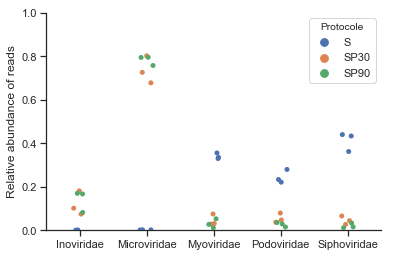

In [139]:
sns.stripplot(data=pd.melt(df_hist.reset_index()[["Phage_Family_Phage1116_def",'S','SP30','SP90']], id_vars=["Phage_Family_Phage1116_def"]),
                   #jitter=0.2,
             x="Phage_Family_Phage1116_def",
             y="value",
             hue="Protocole") 
                #split=True)
              #edgecolor="k")
plt.ylabel("Relative abundance of reads")
plt.ylim(0,1)
plt.tick_params(top=False, right=False)
plt.xlabel("")
sns.despine()

## c

In [142]:
df_algo=pd.read_csv('/Volumes/BIGDATA/Echantillons_Temoins/Read_bruts/ALL_reads/processed/Patient/ALL_ALL_ALL/Result/Big_Table/ALL_ALL_ALL.df_Big_table_PostAlgo.tab', sep='\t', index_col=0)

In [143]:
Liste_dec=["Putative PHAGE","PHAGE with Details"]
Liste_phage=df_algo[df_algo.Final_Decision.isin(Liste_dec)].Contig_Name.tolist()

In [144]:
df_resume_OnlyPhage=df_resume[df_resume.Contig_Name.isin(Liste_phage)]

In [145]:
df_melt_OnlyPhage=df_melt[df_melt. 	ref_genome_format.isin(Liste_phage)]

In [147]:
df_melt_lifestyle=df_melt_OnlyPhage[df_melt_OnlyPhage.LifeS_Decision_final != "NA"]

In [148]:
len(df_melt_lifestyle)

24651

In [149]:
df_melt_lifestyle.groupby(["Protocole"]).sum().value.tolist()

[11287643.795361077, 8427438.069738725, 6937158.674247803]

In [150]:
Liste_tot_lif=df_melt_lifestyle.groupby(["Protocole"]).sum().value.tolist()

In [151]:
Liste_tot_lif1=df_melt_lifestyle.groupby(["Protocole"]).sum().value.tolist()

In [156]:
Liste_tot_lif.extend(Liste_tot_lif1)

In [157]:
len(Liste_tot_lif)

12

Text(0,0.5,'Relative abundance of reads')

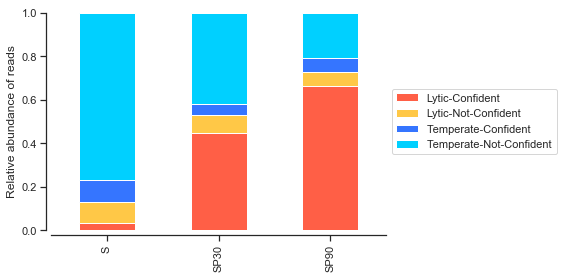

In [159]:
(df_melt_lifestyle.groupby(["LifeS_Decision_final",'Protocole']).value.sum()
 .div(Liste_tot_lif)).to_frame().reorder_levels(["Protocole","LifeS_Decision_final"]).unstack().plot.bar(stacked=True, cmap="Set1",
                                                                                                                     legend=False,
                                                                                                                     colors=["#ff5f46", "#ffc847","#3575ff","#00d0ff"])
#Liste_tot a ete generé au dessus et correspond a la somme des colonnes sans les "NA",
#repeté 5 fois pour etre au meme format que le titibis.groupby["Phage_Family_Phage1116_def",'Patient','Protocole')
sns.despine(offset=5)
plt.xticks(range(0,3),['S',"SP30","SP90"], rotation=90)
plt.legend(loc=6,            bbox_to_anchor=(1,0.5),
           labels=["Lytic-Confident","Lytic-Not-Confident","Temperate-Confident","Temperate-Not-Confident"]
          )
plt.xlabel('')
plt.ylim(0,1)
#plt.tight_layout(rect=[0.1,0,0.65,0.9])
plt.ylabel('Relative abundance of reads')

## d

In [161]:
df_melt_Host=df_melt_OnlyPhage[df_melt_OnlyPhage.Host_Decision_final != "NA"]

In [162]:
Liste_tot_Host=df_melt_Host.groupby(["Protocole"]).sum().value.tolist()

In [163]:
Liste_tot_Host1=df_melt_Host.groupby(["Protocole"]).sum().value.tolist()

In [179]:
Liste_tot_Host.extend(Liste_tot_Host1)

In [180]:
len(Liste_tot_Host)

27

Text(0,0.5,'Relative abundance of reads')

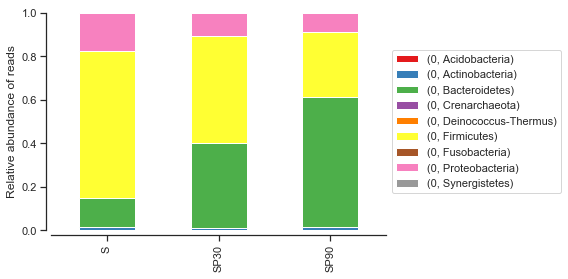

In [182]:
(df_melt_Host.groupby(["Host_Decision_final",'Protocole']).value.sum()
 .div(Liste_tot_Host)).to_frame().reorder_levels(["Protocole","Host_Decision_final"]).unstack().plot.bar(stacked=True, cmap="Set1",
                                                                                                                     legend=False,
                                                                                                                     )
#Liste_tot a ete generé au dessus et correspond a la somme des colonnes sans les "NA",
#repeté 5 fois pour etre au meme format que le titibis.groupby["Phage_Family_Phage1116_def",'Patient','Protocole')
sns.despine(offset=5)
plt.xticks(range(0,3),['S',"SP30","SP90"], rotation=90)
plt.legend(loc=6,            bbox_to_anchor=(1,0.5)
          )
plt.xlabel('')
plt.ylim(0,1)
#plt.tight_layout(rect=[0.1,0,0.7,0.9])
plt.ylabel('Relative abundance of reads')